<a href="https://colab.research.google.com/github/fabiola2024/otro/blob/main/1Pre_entrega_FabiolaCoronel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#cargar las librerias
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

from datetime import datetime, timedelta
from matplotlib import dates as mpl_dates
from mpl_toolkits.mplot3d import Axes3D

# Libreria Bokeh , que se utiliza para crear visualizaciones interactivas en Python
from bokeh.io import output_notebook, show, reset_output
# Other
import bokeh
from bokeh.plotting import figure

#cargar la base de datos
from google.colab import drive
import os
drive.mount('/content/gdrive')
%cd '/content/gdrive/MyDrive/'
df_incendios1 = pd.read_excel('/content/gdrive/MyDrive/CODERHOUSE/Dataset/Posibles dataset/Incendios forestales1.xlsx')
df_incendios1.head()


#Eliminación de filas null
df_incendios_forestales= df_incendios1.dropna()
print (df_incendios_forestales)
#reemplazar objet a float
df_incendios_forestales['total'] = pd.to_numeric(df_incendios_forestales['total'], errors='coerce')
print(df_incendios_forestales[df_incendios_forestales['total'].isna()])


Mounted at /content/gdrive
/content/gdrive/MyDrive
               Provincia     Año    total   enero  febrero   marzo  abril  \
0           Buenos Aires  2015.0   8267.0   787.0    543.0   913.0  836.0   
2              Catamarca  2015.0    722.0     6.0      4.0     3.0    5.0   
4                  Chaco  2015.0  10698.0   140.0    169.0   574.0  178.0   
6                 Chubut  2015.0   6293.0   169.0   3963.0  1870.0   24.0   
8                   CABA  2015.0      3.0     0.0      0.0     0.0    0.0   
..                   ...     ...      ...     ...      ...     ...    ...   
374           Santa Cruz  2022.0    194.0    19.0     11.0    82.0   24.0   
376             Santa Fe  2022.0  30211.0  6052.0   4078.0   690.0  632.0   
378  Santiago del Estero  2022.0  12928.0   847.0    339.0   167.0  273.0   
380     Tierra del Fuego  2022.0     30.0     2.0      5.0     0.0    6.0   
382             TucumÃ¡n  2022.0   4425.0    39.0     21.0    17.0   32.0   

      mayo   junio   jul

<ipython-input-2-20b650f83ad8>:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_incendios_forestales['total'] = pd.to_numeric(df_incendios_forestales['total'], errors='coerce')


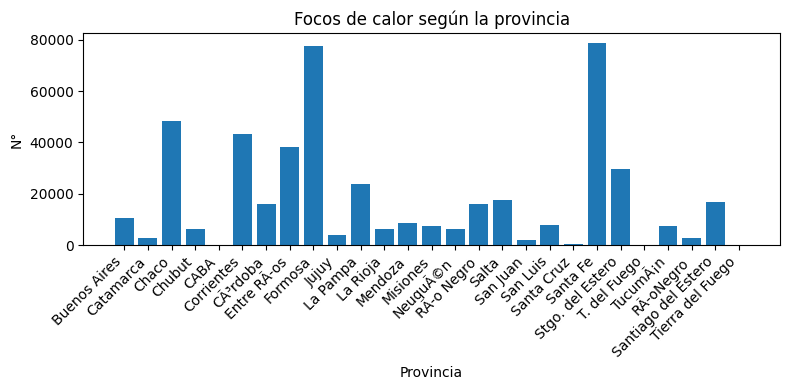

In [ ]:
#grafico 1: Focos de calor según la provincia
fig, ax= plt.subplots(figsize=(8,4))

ax.bar(df_incendios_forestales['Provincia'], df_incendios_forestales['total'])

ax.set_title('Focos de calor según la provincia')
ax.set_ylabel('N°')
ax.set_xlabel('Provincia')
# Rotar las etiquetas del eje x
plt.xticks(rotation=45, ha='right')  # ha='right' para alinear las etiquetas a la derecha

plt.tight_layout()  # Ajustar automáticamente el espacio para que las etiquetas no se corten
plt.show()

Interpretación: Las provincias de Chaco ,Corrientes, Formosa, Santa Fe son las que tienen niveles más altos de focos de calor.

Preparación del dataset

In [ ]:
# Convertir los datos al formato largo
df_incendios_forestales_long = df_incendios_forestales.melt(id_vars=['Provincia', 'Año'], var_name='Mes', value_name='Focos de Calor')
# pasamos la columna ['Año] de float a int
df_incendios_forestales['Año'] = df_incendios_forestales['Año'].astype(int)
print(df_incendios_forestales_long)

                Provincia     Año        Mes  Focos de Calor
0            Buenos Aires  2015.0      total          8267.0
1               Catamarca  2015.0      total           722.0
2                   Chaco  2015.0      total         10698.0
3                  Chubut  2015.0      total          6293.0
4                    CABA  2015.0      total             3.0
...                   ...     ...        ...             ...
2491           Santa Cruz  2022.0  diciembre            98.0
2492             Santa Fe  2022.0  diciembre          1772.0
2493  Santiago del Estero  2022.0  diciembre           813.0
2494     Tierra del Fuego  2022.0  diciembre          1436.0
2495             TucumÃ¡n  2022.0  diciembre           105.0

[2496 rows x 4 columns]


<ipython-input-4-95f16d45e08d>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_incendios_forestales['Año'] = df_incendios_forestales['Año'].astype(int)


In [ ]:
#filtrar las filas con valores total en la columna mes
df_incendios_forestales_long = df_incendios_forestales_long[df_incendios_forestales_long['Mes'] != 'total']
meses_traduccion = {
    'enero': 'January',
    'febrero': 'February',
    'marzo': 'March',
    'abril': 'April',
    'mayo': 'May',
    'junio': 'June',
    'julio': 'July',
    'agosto': 'August',
    'septiembre': 'September',
    'octubre': 'October',
    'noviembre': 'November',
    'diciembre': 'December'
}
# Reemplazar los nombres de los meses en español por inglés
df_incendios_forestales_long['Mes'] = df_incendios_forestales_long['Mes'].replace(meses_traduccion)
print(df_incendios_forestales_long)

#Filtrar datos para el 2020
df_2020 = df_incendios_forestales_long[df_incendios_forestales_long['Año'] == 2020]

print(df_2020)


                Provincia     Año       Mes  Focos de Calor
192          Buenos Aires  2015.0   January           787.0
193             Catamarca  2015.0   January             6.0
194                 Chaco  2015.0   January           140.0
195                Chubut  2015.0   January           169.0
196                  CABA  2015.0   January             0.0
...                   ...     ...       ...             ...
2491           Santa Cruz  2022.0  December            98.0
2492             Santa Fe  2022.0  December          1772.0
2493  Santiago del Estero  2022.0  December           813.0
2494     Tierra del Fuego  2022.0  December          1436.0
2495             TucumÃ¡n  2022.0  December           105.0

[2304 rows x 4 columns]
             Provincia     Año       Mes  Focos de Calor
312       Buenos Aires  2020.0   January           522.0
313          Catamarca  2020.0   January            22.0
314              Chaco  2020.0   January           415.0
315             Chubut  202

<ipython-input-5-2f6b4ba9baee>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_incendios_forestales_long['Mes'] = df_incendios_forestales_long['Mes'].replace(meses_traduccion)


Objetivo

Se va a analizar los perios de tiempo 2020 al 2023. Especificamente el periodo de tiempo entre Junio y Diciembre, se seleccino esta parte porque es cuando se esta transitando el cambio de temporada, de invierno hacia la primavera

Quiero calcular el promedio de focos de calor de provincia, y luego determincar las 10 procincias con mayor número de focos en el año 2020 y graficarlas.

In [ ]:
# Agrupar por provincia y calcular el promedio de focos de calor
promedio_focos_calor = df_2020.groupby('Provincia')['Focos de Calor'].mean().reset_index()
# Ordenar por el promedio de focos de calor en orden descendente
promedio_focos_calor = promedio_focos_calor.sort_values(by='Focos de Calor', ascending=False)
# Seleccionar las 10 provincias con mayor promedio de focos de calor
top_10_provincias = promedio_focos_calor.head(10)
# Filtrar el DataFrame original para incluir solo las 10 provincias seleccionadas
df_top_10 = df_2020[df_2020['Provincia'].isin(top_10_provincias['Provincia'])]

print (top_10_provincias)


           Provincia  Focos de Calor
20          Santa Fe     6561.416667
8            Formosa     6466.333333
3              Chaco     4031.500000
5         Corrientes     3486.416667
7        Entre RÃ­os     3174.416667
21  Stgo. del Estero     2455.083333
16             Salta     1461.750000
6           CÃ³rdoba     1322.500000
0       Buenos Aires      843.583333
18          San Luis      666.416667


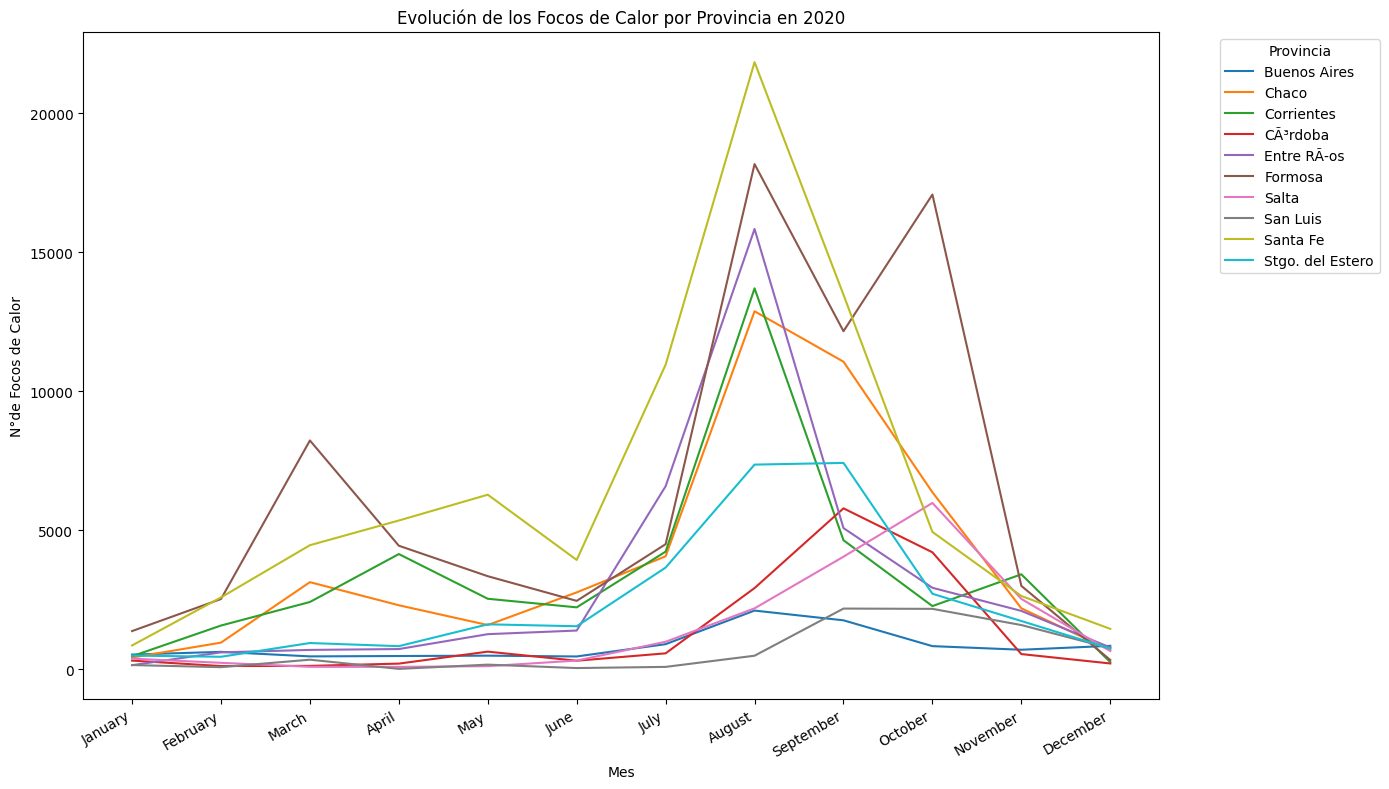

In [ ]:
# Crear la figura y los ejes
plt.figure(figsize=(14, 8))

#importar la libreria
import matplotlib.cm as cm
import numpy as np

# Generar una paleta de colores amplia usando un colormap
colors = cm.tab20(np.linspace(0, 1, len(top_10_provincias)))

# Graficar una línea para cada provincia
for provincia in df_top_10['Provincia'].unique():
    df_provincia = df_top_10[df_top_10['Provincia'] == provincia]
    plt.plot(df_provincia['Mes'], df_provincia['Focos de Calor'], label=provincia)

# Dar formato de fecha al eje X
plt.gcf().autofmt_xdate()

# Añadir título y etiquetas a los ejes
plt.title('Evolución de los Focos de Calor por Provincia en 2020')
plt.xlabel('Mes')
plt.ylabel('N°de Focos de Calor')

# Mostrar la leyenda
plt.legend(title='Provincia', bbox_to_anchor=(1.05, 1), loc='upper left')

# Ajustar los ejes para que no haya solapamiento
plt.tight_layout()

# Mostrar la gráfica
plt.show()

Interpretación: Las provincias con más focos de calor en el año 2020 fueron:

20          Santa Fe     

8            Formosa    

3              Chaco     

5         Corrientes     

7        Entre RÃ­os     

21  Stgo. del Estero     

16             Salta     

6           CÃ³rdoba     

0       Buenos Aires      

18          San Luis    

Los insights de focos de calor son en Agosto y Septiembre. El intervalo temporal son entre Agosto, donde empieza a incremantarse y hasta noviembre donde empieza a decrecer.

3 Grafico
Evolución de los focos de calor en el año 2021

In [ ]:
#Filtrar datos para el 2021
df_2021 = df_incendios_forestales_long[df_incendios_forestales_long['Año']==2021]
print (df_2021)

# Agrupar por provincia y calcular el promedio de focos de calor
promedio_focos_calor_2021 = df_2021.groupby('Provincia')['Focos de Calor'].mean().reset_index()
# Ordenar por el promedio de focos de calor en orden descendente
promedio_focos_calor_2021 = promedio_focos_calor_2021.sort_values(by='Focos de Calor', ascending=False)
# Seleccionar las 10 provincias con mayor promedio de focos de calor
top_10_provincias_2021 = promedio_focos_calor_2021.head(10)
# Filtrar el DataFrame original para incluir solo las 10 provincias seleccionadas
top_10_provincias_2021 = df_2021[df_2021['Provincia'].isin(top_10_provincias_2021['Provincia'])]

print (top_10_provincias_2021)


                Provincia     Año       Mes  Focos de Calor
336          Buenos Aires  2021.0   January          1083.0
337             Catamarca  2021.0   January            33.0
338                 Chaco  2021.0   January           427.0
339                Chubut  2021.0   January            31.0
340                  CABA  2021.0   January             0.0
...                   ...     ...       ...             ...
2467           Santa Cruz  2021.0  December             4.0
2468             Santa Fe  2021.0  December           885.0
2469  Santiago del Estero  2021.0  December           189.0
2470     Tierra del Fuego  2021.0  December             1.0
2471             TucumÃ¡n  2021.0  December            22.0

[288 rows x 4 columns]
                Provincia     Año       Mes  Focos de Calor
336          Buenos Aires  2021.0   January          1083.0
338                 Chaco  2021.0   January           427.0
341            Corrientes  2021.0   January           578.0
343           En

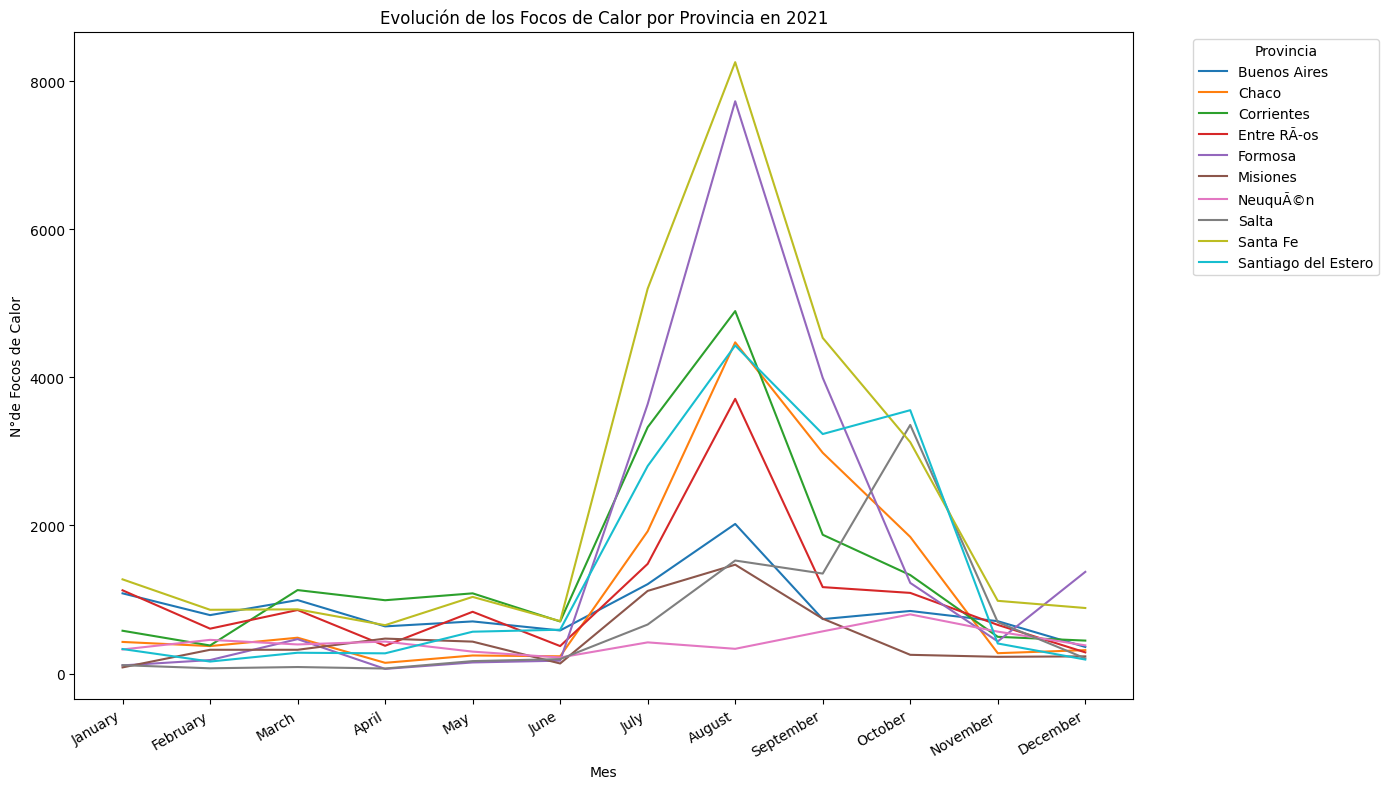

In [ ]:
# Crear la figura y los ejes
plt.figure(figsize=(14, 8))

#importar la libreria
import matplotlib.cm as cm
import numpy as np

# Generar una paleta de colores amplia usando un colormap
colors = cm.tab20(np.linspace(0, 1, len(top_10_provincias)))

# Graficar una línea para cada provincia
for provincia in top_10_provincias_2021['Provincia'].unique():
    df_provincia_2021 = top_10_provincias_2021[top_10_provincias_2021['Provincia'] == provincia]
    plt.plot(df_provincia_2021['Mes'], df_provincia_2021['Focos de Calor'], label=provincia)

# Dar formato de fecha al eje X
plt.gcf().autofmt_xdate()

# Añadir título y etiquetas a los ejes
plt.title('Evolución de los Focos de Calor por Provincia en 2021')
plt.xlabel('Mes')
plt.ylabel('N°de Focos de Calor')

# Mostrar la leyenda
plt.legend(title='Provincia', bbox_to_anchor=(1.05, 1), loc='upper left')

# Ajustar los ejes para que no haya solapamiento
plt.tight_layout()

# Mostrar la gráfica
plt.show()

Las provincias con más focos de calor en el 2021 en el periodo entre Julio y Noviembre son:
1.   Santa Fe
2.   Formosa
3.   Corrientes
4.   Santiago del Estero
5.   Chaco
6.   Entre Rios
7.   Buenos Aires
8.   Salta
9.   Misiones
10.   Neunquen




Conclusiones: Analizando los focos de calor producidos en las provincias de Buenos Aires del 2020 y 2021. Podemos observar que hay un patron repetido, en el cual entre los meses de Julio y Noviembre, se dan los picos de focos de calor. Podriamos decir como hipotesis: quizas es porque en esos periodos se incrementa el calor. Pero algo que llama la atención y quizas la anterior hipotesis, es que ¿Por que no se produce lo mismo entre Diciembre y Febrero, que son las epocas más calurosas, por el hecho de estar en verano?

Continuando con este lineamiento ,vamos a continuar observando que se produce en los dos ultimos años: 2022 - 2023

4 Grafico: Evolución de los focos de calor por provincia en el año 2022

In [ ]:
#Filtrar datos para el 2022
df_2022 = df_incendios_forestales_long[df_incendios_forestales_long['Año']==2022]
# Agrupar por provincia y calcular el promedio de focos de calor
promedio_focos_calor_2022 = df_2022.groupby('Provincia')['Focos de Calor'].mean().reset_index()
print (df_2022)

# Ordenar por el promedio de focos de calor en orden descendente
promedio_focos_calor_2022 = promedio_focos_calor_2022.sort_values(by='Focos de Calor', ascending=False)
print (promedio_focos_calor_2022)

# Seleccionar las 10 provincias con mayor promedio de focos de calor
top_10_provincias_2022 = promedio_focos_calor_2022.head(10)
# Filtrar el DataFrame original para incluir solo las 10 provincias seleccionadas
top_10_provincias_2022 = df_2022[df_2022['Provincia'].isin(top_10_provincias_2022['Provincia'])]

print (top_10_provincias_2022)

                Provincia     Año       Mes  Focos de Calor
360          Buenos Aires  2022.0   January          1955.0
361             Catamarca  2022.0   January           160.0
362                 Chaco  2022.0   January          2937.0
363                Chubut  2022.0   January           821.0
364                  CABA  2022.0   January             0.0
...                   ...     ...       ...             ...
2491           Santa Cruz  2022.0  December            98.0
2492             Santa Fe  2022.0  December          1772.0
2493  Santiago del Estero  2022.0  December           813.0
2494     Tierra del Fuego  2022.0  December          1436.0
2495             TucumÃ¡n  2022.0  December           105.0

[288 rows x 4 columns]
              Provincia  Focos de Calor
5            Corrientes     3821.416667
8               Formosa     3423.083333
16                Salta     3274.000000
20             Santa Fe     3180.333333
7           Entre RÃ­os     1813.000000
21  Santiago del

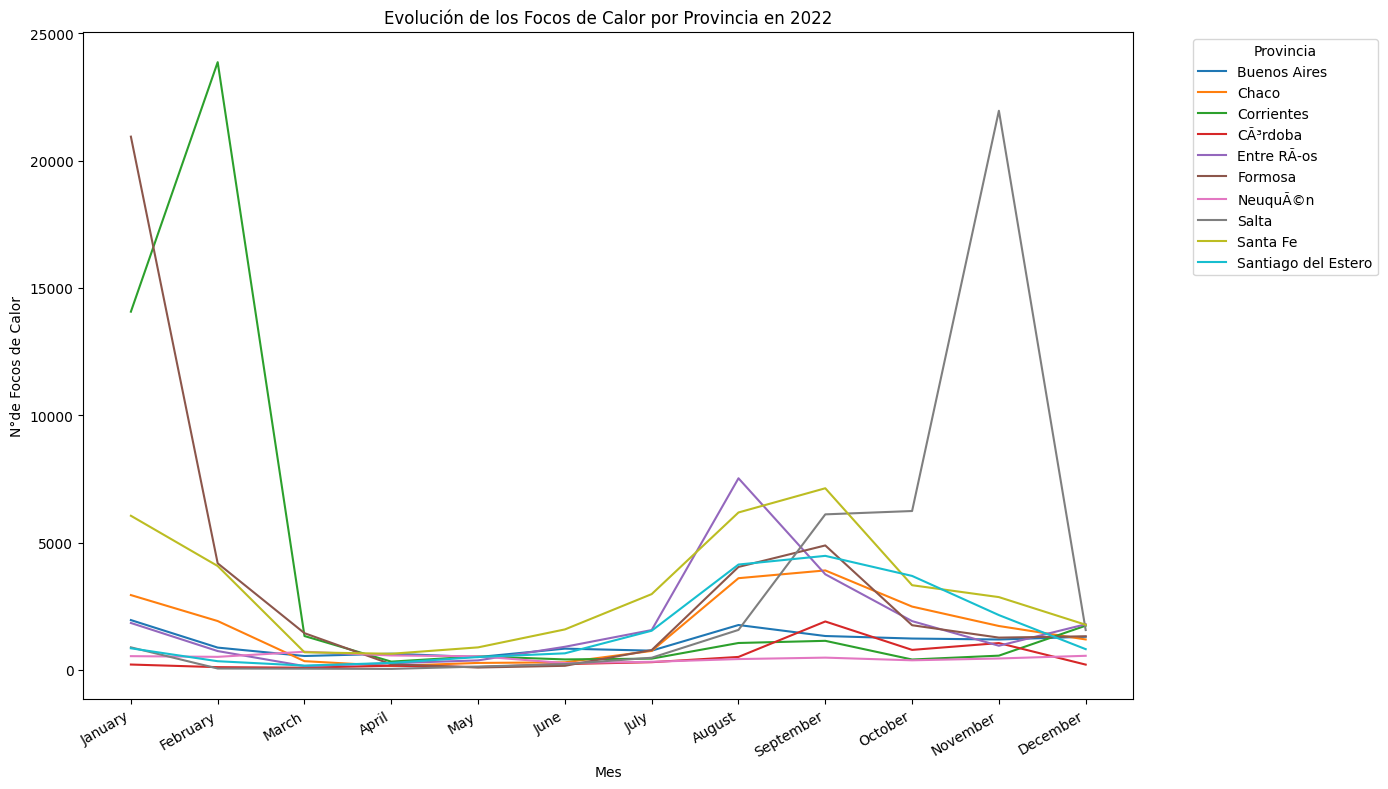

In [ ]:
# Crear la figura y los ejes
plt.figure(figsize=(14, 8))

#importar la libreria
import matplotlib.cm as cm
import numpy as np

# Generar una paleta de colores amplia usando un colormap
colors = cm.tab20(np.linspace(0, 1, len(top_10_provincias)))

# Graficar una línea para cada provincia
for provincia in top_10_provincias_2022['Provincia'].unique():
    df_provincia_2022 = top_10_provincias_2022[top_10_provincias_2022['Provincia'] == provincia]
    plt.plot(df_provincia_2022['Mes'], df_provincia_2022['Focos de Calor'], label=provincia)

# Dar formato de fecha al eje X
plt.gcf().autofmt_xdate()

# Añadir título y etiquetas a los ejes
plt.title('Evolución de los Focos de Calor por Provincia en 2022')
plt.xlabel('Mes')
plt.ylabel('N°de Focos de Calor')

# Mostrar la leyenda
plt.legend(title='Provincia', bbox_to_anchor=(1.05, 1), loc='upper left')

# Ajustar los ejes para que no haya solapamiento
plt.tight_layout()

# Mostrar la gráfica
plt.show()

Interpretación. Los focos de calor más altos entre los meses Julio y Noviembre

*   Entre Rios
*   Santa Fe
*   Salta
*   Formosa
*   Santiago del Estero
*   Chaco







4 Grafico: Evolución de los focos de calor por provincia en el año 2023

In [ ]:
print (df_incendios_forestales['Año'].unique())

[2015 2016 2017 2018 2019 2020 2021 2022]


En este caso como no me aparece el 2023, voy a volver a cargar el dataframe original

In [ ]:
# pasamos la columna ['Año] de float a int
df_2023['Año'] = df_2023['Año'].astype(int)
print(df_2023)

print (df_2023.dtypes)


               Provincia   Año    total   enero  febrero   marzo   abril  \
384         Buenos Aires  2023   9542.0  1779.0   1327.0  1186.0   720.0   
386            Catamarca  2023    632.0    51.0     46.0    12.0    23.0   
388                Chaco  2023  14700.0  1187.0    700.0   680.0   362.0   
390               Chubut  2023    622.0    51.0    469.0    15.0     5.0   
392                 CABA  2023      4.0     4.0      0.0     0.0     0.0   
394           Corrientes  2023  23851.0  3105.0   8471.0  2548.0  1842.0   
396             CÃ³rdoba  2023   2345.0   106.0     85.0    79.0   113.0   
398          Entre RÃ­os  2023  10591.0  2589.0   2281.0  2676.0   352.0   
400              Formosa  2023  24200.0  2004.0    817.0   356.0   253.0   
402                Jujuy  2023    727.0    46.0     20.0    22.0    34.0   
404             La Pampa  2023   2455.0   417.0    532.0   287.0    68.0   
406             La Rioja  2023    747.0   112.0     19.0    41.0    36.0   
408         

In [ ]:
df_2023=df_2023[df_2023['Año']==2023]
# pasamos la columna ['Año] de float a int
df_2023['Año'] = df_2023['Año'].astype(int)
print(df_2023)

               Provincia   Año    total   enero  febrero   marzo   abril  \
384         Buenos Aires  2023   9542.0  1779.0   1327.0  1186.0   720.0   
386            Catamarca  2023    632.0    51.0     46.0    12.0    23.0   
388                Chaco  2023  14700.0  1187.0    700.0   680.0   362.0   
390               Chubut  2023    622.0    51.0    469.0    15.0     5.0   
392                 CABA  2023      4.0     4.0      0.0     0.0     0.0   
394           Corrientes  2023  23851.0  3105.0   8471.0  2548.0  1842.0   
396             CÃ³rdoba  2023   2345.0   106.0     85.0    79.0   113.0   
398          Entre RÃ­os  2023  10591.0  2589.0   2281.0  2676.0   352.0   
400              Formosa  2023  24200.0  2004.0    817.0   356.0   253.0   
402                Jujuy  2023    727.0    46.0     20.0    22.0    34.0   
404             La Pampa  2023   2455.0   417.0    532.0   287.0    68.0   
406             La Rioja  2023    747.0   112.0     19.0    41.0    36.0   
408         

In [ ]:
# Convertir los datos al formato largo
df_incendios_forestales_long_2023 = df_2023.melt(id_vars=['Provincia', 'Año'], var_name='Mes', value_name='Focos de Calor')
# pasamos la columna ['Año] de float a int
df_2023['Año'] = df_2023['Año'].astype(int)
print(df_incendios_forestales_long_2023)

               Provincia   Año        Mes  Focos de Calor
0           Buenos Aires  2023      total          9542.0
1              Catamarca  2023      total           632.0
2                  Chaco  2023      total         14700.0
3                 Chubut  2023      total           622.0
4                   CABA  2023      total             4.0
..                   ...   ...        ...             ...
307           Santa Cruz  2023  diciembre             NaN
308             Santa Fe  2023  diciembre             NaN
309  Santiago del Estero  2023  diciembre             NaN
310         T. del Fuego  2023  diciembre             NaN
311             TucumÃ¡n  2023  diciembre             NaN

[312 rows x 4 columns]


In [ ]:
#filtrar las filas con valores total en la columna mes
df_incendios_forestales_long_2023 = df_incendios_forestales_long_2023[df_incendios_forestales_long_2023['Mes'] != 'total']
meses_traduccion = {
    'enero': 'January',
    'febrero': 'February',
    'marzo': 'March',
    'abril': 'April',
    'mayo': 'May',
    'junio': 'June',
    'julio': 'July',
    'agosto': 'August',
    'septiembre': 'September',
    'octubre': 'October',
    'noviembre': 'November',
    'diciembre': 'December'
}
# Reemplazar los nombres de los meses en español por inglés
df_incendios_forestales_long_2023['Mes'] = df_incendios_forestales_long_2023['Mes'].replace(meses_traduccion)
print(df_incendios_forestales_long_2023)

print(df_2023)

               Provincia   Año       Mes  Focos de Calor
24          Buenos Aires  2023   January          1779.0
25             Catamarca  2023   January            51.0
26                 Chaco  2023   January          1187.0
27                Chubut  2023   January            51.0
28                  CABA  2023   January             4.0
..                   ...   ...       ...             ...
307           Santa Cruz  2023  December             NaN
308             Santa Fe  2023  December             NaN
309  Santiago del Estero  2023  December             NaN
310         T. del Fuego  2023  December             NaN
311             TucumÃ¡n  2023  December             NaN

[288 rows x 4 columns]
               Provincia   Año    total   enero  febrero   marzo   abril  \
384         Buenos Aires  2023   9542.0  1779.0   1327.0  1186.0   720.0   
386            Catamarca  2023    632.0    51.0     46.0    12.0    23.0   
388                Chaco  2023  14700.0  1187.0    700.0   680.0

In [ ]:
# Agrupar por provincia y calcular el promedio de focos de calor
promedio_focos_calor_2023 = df_2023.groupby('Provincia')['Focos de Calor'].mean().reset_index()
# Ordenar por el promedio de focos de calor en orden descendente
promedio_focos_calor_2023 = promedio_focos_calor_2023.sort_values(by='Focos de Calor', ascending=False)
# Seleccionar las 10 provincias con mayor promedio de focos de calor
top_10_provincias_2023 = promedio_focos_calor.head(10)
# Filtrar el DataFrame original para incluir solo las 10 provincias seleccionadas
df_top_10_2023 = df_2023[df_2023['Provincia'].isin(top_10_provincias_2023['Provincia'])]

print (top_10_provincias_2023)

KeyError: 'Column not found: Focos de Calor'

Grafico de dispersión. Relación entre los focos de calor y hectareas quemadas de 23 provincias

In [ ]:
#Filtrar datos para el 2021
df_2022 = df_incendios_forestales_long[df_incendios_forestales_long['Año']==2022]
print(df_2022)

                Provincia     Año       Mes  Focos de Calor
360          Buenos Aires  2022.0   January          1955.0
361             Catamarca  2022.0   January           160.0
362                 Chaco  2022.0   January          2937.0
363                Chubut  2022.0   January           821.0
364                  CABA  2022.0   January             0.0
...                   ...     ...       ...             ...
2491           Santa Cruz  2022.0  December            98.0
2492             Santa Fe  2022.0  December          1772.0
2493  Santiago del Estero  2022.0  December           813.0
2494     Tierra del Fuego  2022.0  December          1436.0
2495             TucumÃ¡n  2022.0  December           105.0

[288 rows x 4 columns]


Utilizó  la solapa "sup.a por incendios reportados" de la base de datos (en excel)

In [ ]:
#cargar la base de datos
from google.colab import drive
import os
drive.mount('/content/gdrive')
%cd '/content/gdrive/MyDrive/'
df_hectareas_quemadas = pd.read_excel('/content/gdrive/MyDrive/CODERHOUSE/Dataset/Posibles dataset/Sup afect por incendios reportados.xlsx')
df_hectareas_quemadas.head()


Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
/content/gdrive/MyDrive


,Provincia,Hectareas_2017,Hectareas_2018,Hectareas_2019,Hectareas_2020,Hectareas_2021,Hectareas_2022,Hectareas_2023
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Buenos Aires,52324.0,55036,24714.0,4643,7033,142.0,4523.0
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,CABA,0.0,s/d,0.0,1,0,0.0,49.0
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
#Eliminación de filas null
df_hectareas_quemadas = df_hectareas_quemadas.dropna()
print (df_hectareas_quemadas)

print (df_hectareas_quemadas.dtypes)

              Provincia  Hectareas_2017 Hectareas_2018  Hectareas_2019  \
1          Buenos Aires         52324.0          55036         24714.0   
3                  CABA             0.0            s/d             0.0   
5             Catamarca         17385.0           7261         12035.0   
7                 Chaco          3470.0           3896          3039.0   
9                Chubut          2566.0            939         13289.0   
11             CÃ³rdoba         34010.0           8745         16602.0   
13           Corrientes          1443.0          21608          2464.0   
17              Formosa          5362.0           3119         14336.0   
19                Jujuy          1214.0            474          6018.0   
21             La Pampa        552902.0         704125        154177.0   
23             La Rioja        131535.0           1514          2071.0   
25              Mendoza        419147.0          75393         65022.0   
27             Misiones           246.

In [ ]:
# Crear un DataFrame de hectareas quemadas que solo incluya el año 2022 y agregue una columna de Provincia
# Aquí supongo que las filas del DataFrame de hectareas quemadas representan provincias en orden.
provincias = [
    "Buenos Aires", "Catamarca", "Chaco", "Chubut", "CABA", "Córdoba", "Corrientes",
    "Entre Ríos", "Formosa", "Jujuy", "La Pampa", "La Rioja", "Mendoza", "Misiones",
    "Neuquén", "Río Negro", "Salta", "San Juan", "San Luis", "Santa Cruz", "Santa Fe",
    "Santiago del Estero", "Tierra del Fuego", "Tucumán"
]
# Asegúrate de ajustar el índice si el número de provincias no coincide
df_hectareas_quemadas['Provincia'] = provincias[:len(df_hectareas_quemadas)]
hectareas_quemadas_2022 = df_hectareas_quemadas[['Provincia', 'Hectareas_2022']]

# Combinar ambos DataFrames en uno solo
df_relación= pd.merge(hectareas_quemadas_2022, df_2022, on='Provincia')

# Mostrar el DataFrame combinado
print(df_relación)


        Provincia  Hectareas_2022     Año        Mes  Focos de Calor
0    Buenos Aires           142.0  2022.0    January          1955.0
1    Buenos Aires           142.0  2022.0   February           874.0
2    Buenos Aires           142.0  2022.0      March           544.0
3    Buenos Aires           142.0  2022.0      April           634.0
4    Buenos Aires           142.0  2022.0        May           502.0
..            ...             ...     ...        ...             ...
199      Santa Fe          9437.0  2022.0     August          6181.0
200      Santa Fe          9437.0  2022.0  September          7132.0
201      Santa Fe          9437.0  2022.0    October          3324.0
202      Santa Fe          9437.0  2022.0   November          2857.0
203      Santa Fe          9437.0  2022.0   December          1772.0

[204 rows x 5 columns]


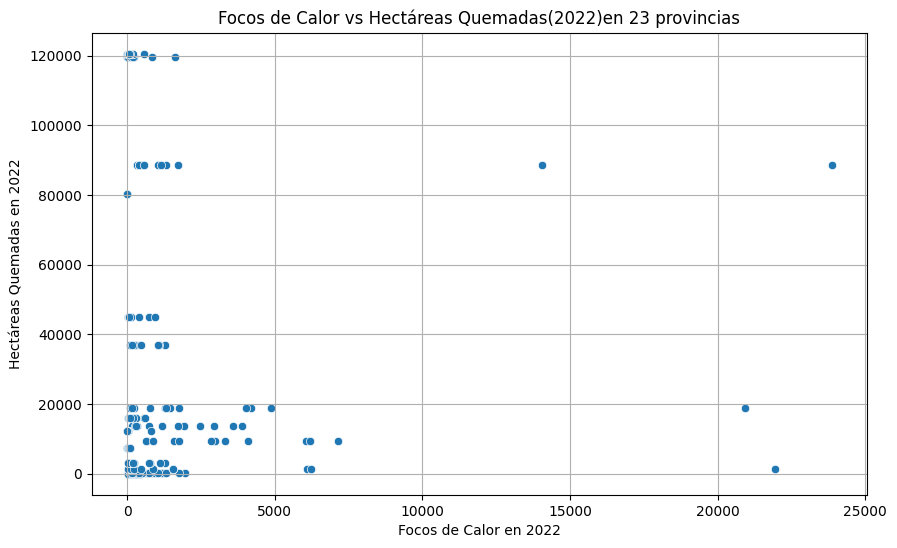

In [ ]:
# Crear el gráfico de dispersión
plt.figure(figsize=(10, 6))
sns.scatterplot(data = df_relación, x='Focos de Calor', y='Hectareas_2022')

# Añadir etiquetas y título
plt.xlabel('Focos de Calor en 2022')
plt.ylabel('Hectáreas Quemadas en 2022')
plt.title('Focos de Calor vs Hectáreas Quemadas(2022)en 23 provincias')
plt.grid(True)
plt.show()